# Deep Learning for Computer Vision

In computing, an image is fundamentally represented as a **multi-dimensional tensor (array)** of pixel intensity values. The typical dimensionality for a color image is $(C, H, W)$, where:

* **C (Channels):** The depth dimension, representing the different color components of a pixel. For standard RGB (Red, Green, Blue) images, $C=3$.
* **H (Height):** The number of pixels along the vertical axis.
* **W (Width):** The number of pixels along the horizontal axis.

For example, a standard color image with a resolution of $1080 \times 1920$ is represented as a tensor of shape $\text{3} \times \text{1080} \times \text{1920}$.

While images are structured data, the task of **Computer Vision**, that is enabling machines to "see" and interpret the visual world, remains one of the most challenging problems in AI. A slight shift in viewpoint, lighting, or background can drastically change the raw pixel values of an image, yet a human can instantly recognize the underlying object.

Deep Learning, particularly through the use of **Convolutional Neural Networks (CNNs)**, provides the necessary framework to learn robust, hierarchical, and translation-invariant features directly from these pixel tensors, transforming raw visual data into meaningful semantic information.
In this notebook, we'll introduce the main ideas behind CNNs, and train our own network on a simple image classification task.

<div class="alert alert-block alert-info">
    
<b> Exercise 2.0: </b>
* Pick your favorite image and load it using the [`PIL.Image` library](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open).
* Convert the image to a grayscale image (cf. [here](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.Image.convert)).
* Convert the image to a numpy array.
* Display the image using `matplotlib.pyplot`. 
</div>

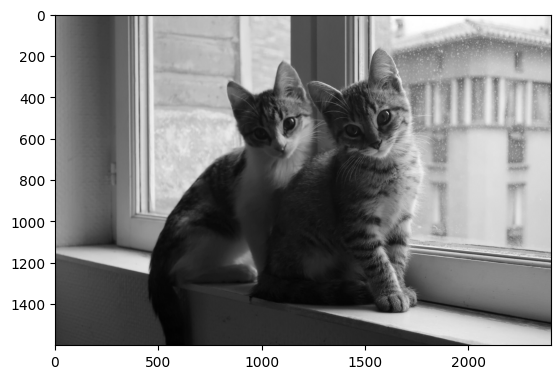

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load image
image = Image.open("noisette-loo.jpg")

# Convert it to grayscale and to a numpy array
image = image.convert("L")
image = np.array(image)
# Display it using plt
plt.imshow(image, cmap="gray")

## Convolutions: The Foundation of Image Processing

Convolution is the fundamental operation in modern Computer Vision, particularly within Convolutional Neural Networks (CNNs). It is a linear operation applied across the pixel values of an input image tensor.

The convolution is defined by a kernel (or filter), which is a small, multi-dimensional array of learnable parameters (weights).
The kernel is systematically slid (convolved) across the entire input image, pixel by pixel.
At each position, the convolution layer performs an element-wise multiplication between the kernel's values and the corresponding patch of input pixels, followed by a summation (a dot product). This result becomes a single pixel value in the output feature map.
Since the kernel is typically much smaller than the input image, this operation is highly efficient compared to a full matrix multiplication across the entire image.

<p style="text-align: center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif" alt="Dot Product gif available at: https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif" />
</p>

## Properties of Convolutions

The power of convolutions stems from two crucial properties:

1. **Translation Invariance** (or Equivariance):
This property means that applying the same kernel across the entire image allows the network to learn a feature (e.g., an edge, a curve) that can be detected regardless of its location in the image. If a feature is recognized in the top-left corner, the same kernel can recognize it in the bottom-right corner. This is essential for object detection and recognition.

2. **Locality** (Sparse Interaction):
The output value of a pixel in the feature map depends only on the values of the pixels in its immediate neighborhood (the area covered by the kernel). This property exploits the fact that features in natural images are formed by local, spatial correlations, significantly reducing the number of parameters the network needs to learn compared to a fully connected layer.

The output of a convolution operation is a new feature map whose size is determined by the input size, the kernel size, and other hyperparameters like stride and padding.

**Padding** involves strategically adding a border of values (typically zeros) around the input image tensor before the convolution is applied.
The primary purpose is to allow the kernel to cover the edge pixels of the input. Without padding, the output size shrinks with every convolution. By adding padding, we can ensure the output feature map has the same spatial dimensions as the input, a configuration often called "same padding."

The **Stride** parameter specifies the number of pixels the kernel shifts across the input image after each computation.
With S = 1 (default), the kernel moves one pixel at a time, resulting in an output feature map size very similar to the input (depending on padding).
With S > 1, the kernel skips pixels, causing the output feature map to be spatially down-sampled (reduced in size). This is a common way to reduce computation and memory use in the network's early layers.

Padding: 1 Striding: 1 | Padding: 2 Striding: 1 | Padding: 1 Striding: 2
:---------------------:|:----------------------:|:----------------------:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Convolution_arithmetic_-_Arbitrary_padding_no_strides_transposed.gif/640px-Convolution_arithmetic_-_Arbitrary_padding_no_strides_transposed.gif) | ![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Convolution_arithmetic_-_Arbitrary_padding_no_strides.gif/640px-Convolution_arithmetic_-_Arbitrary_padding_no_strides.gif) | ![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/Convolution_arithmetic_-_Padding_strides.gif/640px-Convolution_arithmetic_-_Padding_strides.gif)

Another way of modifying the output size of the convolution is the use of pooling layers.
**Pooling** (or Subsampling) is a non-linear operation, usually inserted periodically between successive convolution layers, designed to progressively reduce the spatial size of the representation. This operation allows for reducing the number of parameters in the network (as the output of the layer is smaller than its input thus decreasing the computational load for subsequent layers) and enhancing robustness as it provides a form of translation invariance by making the network less sensitive to small shifts and distortions in the input.

The most frequently used pooling method is **Max Pooling**: given a defined window size (e.g., 2×2) and a stride, the operation slides the window over the input feature map and outputs the maximum value within that window.

This technique aggressively reduces the spatial size (e.g., a 2×2 pool with stride 2 halves the width and height) while retaining the most salient features (the largest activation values) within the local region.

<p style="text-align:center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Max_pooling.png/640px-Max_pooling.png" alt="Max pooling img available at: https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Max_pooling.png/640px-Max_pooling.png" />
</p>

If the functioning of CNN is still unclear, you can take a look at this [article](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53) or this [Stanford course](https://cs231n.github.io/convolutional-networks/).

The examples above show 2D images and 2D kernels, but since it is a dot product it can also be applied with RGB images (or on any number of channels, e.g. hyperspectral images):

2D | 3D
:---: | :---:
![](https://upload.wikimedia.org/wikipedia/commons/a/a5/Convolutional_Neural_Network_NeuralNetworkFilter.gif?20190217151520) | ![](https://upload.wikimedia.org/wikipedia/commons/9/95/Convolutional_Neural_Network_with_Color_Image_Filter.gif?20190217151516)

<div class="alert alert-block alert-info">
    
<b> Exercise 2.1: </b>
* Implement your convolution function using `numpy`.
* Apply your convolution function to the grayscale image from exercise 1.0. With a kernel of size 3x3, and with the following values: `[[1, 0, -1], [1, 0, -1], [1, 0, -1]]`.
* Display the output image using `matplotlib.pyplot`.
* What do you think this convolution kernel is doing to the image?
</div>

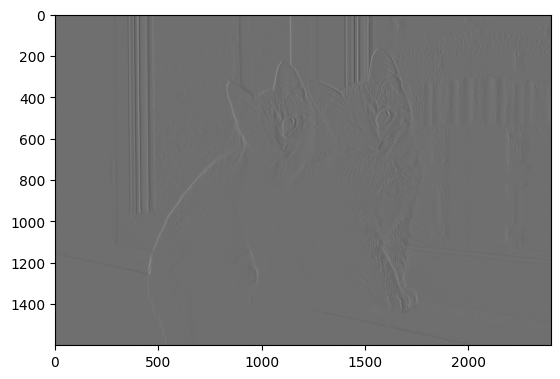

In [15]:
import numpy as np

def my_convolution(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    # Your function should handle padding
    
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    padding = (kernel_height-1) // 2 
    
    image_modif = np.pad(image, padding,mode="constant")
    
    output = np.zeros((image_height,image_width))
    
    for i in range(image_height):
        for j in range(image_width):
            region = image_modif[i:i+3, j:j+3] 
            output[i, j] = np.sum(region * kernel)
    
    return output
    


kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])
convoluted_image = my_convolution(image, kernel)

plt.imshow(convoluted_image, cmap='gray')
plt.show()

## Implementation

While the conceptual definition of convolution involves sliding a kernel, high-performance computing often requires more optimized approaches. Techniques like the [*im2col trick*](https://hackmd.io/@machine-learning/blog-post-cnnumpy-fast) (Image-to-Column) or Fast Fourier Transform (FFT) are utilized in hardware-accelerated libraries to reorganize the tensor data. This allows the convolution to be computed as an efficient matrix multiplication, leveraging highly optimized linear algebra routines.

As seen in the previous module, data in PyTorch is stored in Tensors. For Computer Vision, Tensors are used to store image data (typically in $(N, C, H, W)$ format, where $N$ is the batch size).

PyTorch provides built-in utilities (like the torchvision package) to access common datasets (e.g., CIFAR, MNIST) and tools (Dataset and DataLoader) for efficiently loading and batching large amounts of image data into memory on the fly.

Let's take a look at FashionMNIST, a dataset of 60,000 28x28 grayscale images split in 10 classes of 6,000 images each (T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle Boot).

In [8]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

data = datasets.FashionMNIST(root="data", download=True, transform=ToTensor())
# ToTensor converts a PIL image or NumPy ndarray into a FloatTensor
# and scales the image's pixel intensity values in the range [0., 1.]

dataloader = DataLoader(data, batch_size=32, shuffle=True, num_workers=4)

100.0%
100.0%
100.0%
100.0%


Dataloaders are iterables: they don't load the whole dataset in memory but only the minibatches on which you want to perform operations.  
They behave like Iterators in Python.

In [10]:
X, y = next(iter(dataloader))
print(X,y)

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0118,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0118,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

Unlike TensorFlow, in Pytorch the axis of the channels is located on the second dimension (the first being the batch dimension).

In [12]:
import matplotlib.pyplot as plt

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: torch.Size([32, 1, 28, 28])
y shape: torch.Size([32])


In [13]:
labels_map = {
    0: "t-shirt",
    1: "trouser",
    2: "pullover",
    3: "dress",
    4: "coat",
    5: "sandal",
    6: "shirt",
    7: "sneaker",
    8: "bag",
    9: "ankle boot",
}

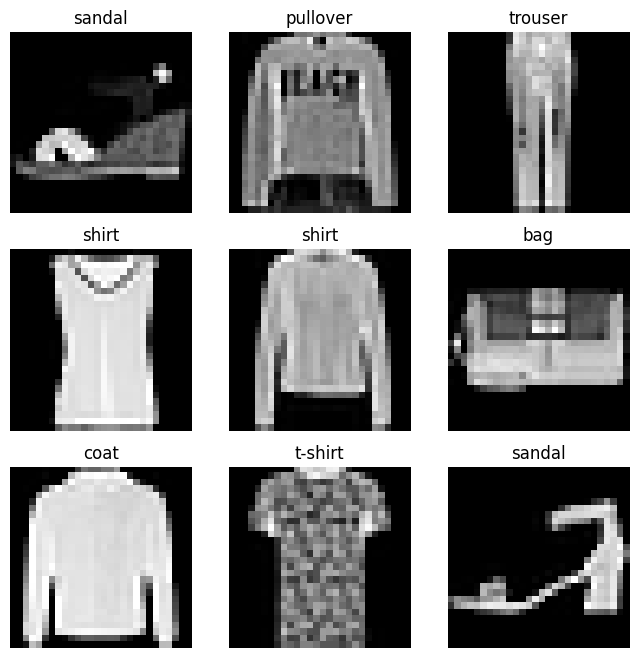

In [14]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[y[i].item()])
    plt.axis("off")
    plt.imshow(X[i].permute(1, 2, 0), cmap='gray')

plt.show()

# Defining Neural Networks in PyTorch

In PyTorch, all neural network layers and complete models inherit from the base class `torch.nn.Module`. This framework provides the essential structure for defining trainable models.
To create a custom neural network, you typically define a new class that inherits from `nn.Module`. This class requires two key methods:

* `__init__(self, ...)`: The constructor is used to initialize all the individual layers, components, and sub-modules that the network will use (e.g., Convolution layers, Linear layers, Batch Normalization). These components become the trainable parameters of the model.

* `forward(self, x)`: This method defines the sequence of operations (the computational graph) that transforms the input tensor $x$ into the network's output $\hat{y}$. It describes how the initialized layers are connected and what operations are performed.

A key benefit of using the nn.Module is that you do not need to implement the backward pass manually.
When the forward pass is executed, PyTorch automatically records the sequence of operations.
The backward() method is then automatically generated using Autograd (PyTorch's automatic differentiation engine), which applies the chain rule to compute all necessary gradients $\frac{\partial L}{\partial \mathbf{W}}$.

In the following exercises, we will implement these concepts by training a simple neural network to classify fashion items using the FashionMNIST dataset.

In [16]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

<div class="alert alert-block alert-info">
    
<b> Exercise 2.2: </b>
* Write a convolutional neural network that takes as input a 28x28 image and outputs a vector of size 10.

The model should look like this:
```
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (relu): ReLU()
  (pooling1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (relu): ReLU()
  (pooling2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dropout): Dropout(p=0.2, inplace=False)
  (linear1): Linear(in_features=512, out_features=128, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (relu): ReLU()
  (linear3): Linear(in_features=64, out_features=10, bias=True)
```
**Hint**: all these layers are defined in the `torch.nn` module.
</div>

### Note: Regularization using Dropout

As we quickly mentioned at the end of the previous notebook, **Dropout** is a powerful and widely used regularization technique designed to prevent neural networks from overfitting to the training data.
During training, at every forward pass of a layer with dropout enabled, each neuron (or feature map element, in Dropout2d) is temporarily "dropped out" (set to zero) with a given probability p (e.g., p=0.2 here).
This creates a different, "thinned" network for every training sample. During evaluation, Dropout is disabled.

By randomly dropping neurons, the network cannot rely on any single neuron or specific set of neurons to make a prediction, which forces other neurons to step up and learn redundant, more robust features.

Dropout can be viewed as training an exponentially large number of different "thinned" networks that share weights. When the full network is used during testing, it effectively acts as an ensemble of all these thinned networks, which significantly reduces the risk of overfitting.

In [18]:
from torch import nn

class FashionMNISTClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        self.relu = nn.ReLU()
        
        self.conv2 = nn.Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
        # self.pooling2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        self.flatten = nn.Flatten(start_dim=1, end_dim=-1)
        self.dropout = nn.Dropout(p=0.2, inplace=False)
        self.linear1 = nn.Linear(in_features=512, out_features=128, bias=True)
        # self.activation2 =nn.ReLU()
        self.linear2 = nn.Linear(in_features=128, out_features=64, bias=True)
        # self.activation3 =nn.ReLU()
        self.linear3 = nn.Linear(in_features=64, out_features=10, bias=True)
        

    def forward(self, x):
        # Implement the computation graph
        value1 = self.relu(self.conv1(x))
        
        value2= self.relu(self.conv2(self.max_pool(value1)))
        
        value3 = self.relu(self.linear1(self.dropout(self.flatten(self.max_pool(value2)))))
        
        value4 = self.relu(self.linear2(value3))
        
        y = self.relu(self.linear3(value4))
        
        
        
        return y

In [19]:
model = FashionMNISTClassifier()
print(model)

FashionMNISTClassifier(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dropout): Dropout(p=0.2, inplace=False)
  (linear1): Linear(in_features=512, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)


A second way to create networks is to build a sequence of modules using an instance of the `Sequential` class.  
This class will simply create a single branch graph that will call all its elements sequentially

In [20]:
model = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=(5, 5)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Dropout(0.2),
            nn.Linear(in_features=32 * 4 * 4, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=10))
print(model)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Dropout(p=0.2, inplace=False)
  (8): Linear(in_features=512, out_features=128, bias=True)
  (9): ReLU()
  (10): Linear(in_features=128, out_features=64, bias=True)
  (11): ReLU()
  (12): Linear(in_features=64, out_features=10, bias=True)
)


You can easily mix the two ways for better readability:

In [22]:
class FashionMNISTClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=(5, 5)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.flatten = nn.Flatten()
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(in_features=32 * 4 * 4, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=10)
            )
        

    def forward(self, x):
        x = self.features(x)
        x = self.flatten(x)
        y = self.classifier(x)
        return y
    
model = FashionMNISTClassifier()
print(model)

FashionMNISTClassifier(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=512, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=10, bias=True)
  )
)


Pytorch allows to train neural networks using the acceleration provided by GPUs.

In [23]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

## Training Loop

<div class="alert alert-block alert-info">
    
<b> Exercise 2.3: </b>
* Complete the training loop below.
* Comment each line
</div>

In [ ]:
from tqdm.notebook import tqdm
from statistics import mean

def train(net, optimizer, loader, epochs=10):
    criterion = nn.CrossEntropyLoss()

    for epoch in tqdm(range(epochs), desc='Epoch', leave=False):
        running_loss = []
        t = tqdm(loader, desc='batch', leave=False)
        for x, y in t:
            x, y = x.to(device), y.to(device)

            optimizer.zero_grad()
            outputs = net(x)
            loss = criterion(outputs, y)
            running_loss.append(loss.item())
            ...
            ...
            ...
            t.set_description(f'Training loss: {mean(running_loss)}')

In [ ]:
import torch.optim as optim

lr = 1e-3
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
train(model, optimizer, train_dataloader, 10)

When we want to evaluate our network (i.e. compute the forward pass only), it is no longer necessary to store the information allowing us to compute the gradients.  
In order to speed up the inference, Pytorch offers an option to avoid these unnecessary computations.

<div class="alert alert-block alert-info">
    
<b> Exercise 2.4: </b>
* Explain what is `torch.no_grad()`.
* What does the `test()` function return?
</div>

In [ ]:
def test(model, dataloader):
    test_corrects = 0
    total = 0
    with torch.no_grad():
        for x, y in dataloader:
            x = x.to(device)
            y = y.to(device)
            y_hat = model(x).argmax(1)
            test_corrects += y_hat.eq(y).sum().item()
            total += y.size(0)
    return test_corrects / total

As mentionned above, certain layers like Dropout (or Batch-normalization) have a different behavior during training and evaluation. It it therefore important to indicate the learning mode to Pytorch using `model.train()` or `model.eval()` (cf. [documentation](https://docs.pytorch.org/docs/stable/notes/autograd.html#evaluation-mode-nn-module-eval)).

In [ ]:
model.eval()
test_acc = test(model, test_dataloader)
print(f'Test accuracy: {100 * test_acc:.2f} %')

## Saving and Loading Model Weights

In PyTorch, the trainable parameters (weights and biases) of an `nn.Module` are stored in an internal dictionary called the state dictionary (`state_dict`). It is a mapping of every layer to its corresponding parameter tensor (cf. [documentation](https://docs.pytorch.org/tutorials/beginner/saving_loading_models.html#what-is-a-state-dict)).

To save your trained model to disk, you can use the [`torch.save` method](https://docs.pytorch.org/docs/stable/generated/torch.save.html) to serialize this state dictionary.

To restore a model's state, you must first create an instance of the model class (which defines the architecture) and then load the saved parameters using the [`load_state_dict` method](https://docs.pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.load_state_dict).

<div class="alert alert-block alert-info">
    
<b> Exercise 2.5: </b>
* Save the trained model on disk, then load it again and perform an evaluation
</div>

In [ ]:
# Save the model in "data/fashion_mnist_classifier.pth"
...

# Delete the model from memory
del model

# Recreate the model and load its weights from the saved file
model = ...

# Re-evaluate it
model.eval()
test_acc = test(model, test_dataloader)
print(f'Test accuracy: {100 * test_acc:.2f} %')

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    figure.add_subplot(rows, cols, i)
    x_i, y_i = X[i].unsqueeze(0), y[i]
    y_pred = model(x_i).argmax(1)
    true_label = labels_map[y_i.item()]
    pred_label = labels_map[y_pred.item()]
    plt.title(f"P:{pred_label} ({true_label})")
    plt.axis("off")
    plt.imshow(X[i].permute(1, 2, 0), cmap='gray')

plt.show()